In [1]:
import ROOT
from ROOT import TMath
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/02


In [50]:

'''Importing the data from the ROOT files'''

ttH = ROOT.TFile.Open("mc_341081.ttH125_gamgam.GamGam.root")
ggH = ROOT.TFile.Open("mc_343981.ggH125_gamgam.GamGam.root")
WWH = ROOT.TFile.Open("mc_345041.VBFH125_gamgam.GamGam.root")
data1 = ROOT.TFile.Open("data_A.GamGam.root")

Channels = {"ttH":ttH.Get("mini"),"ggH":ggH.Get("mini"),"WWH":WWH.Get("mini"), 'data1':data1.Get('mini')}

for channel in Channels:
    print("Channel:",channel,"has",Channels[channel].GetEntries(),"entries")

OutputMap = {"ttH":[1,0,0,0],"ggH":[0,1,0,0],"WWH":[0,0,1,0], 'data1':[0,0,0,1]}

# Here we shall store the two photons & outputs 
dataset = []

# Prepare Data for NN
# Events are not filtered by LLT or HLT

for channel in Channels:
    print("Processing Channel ",channel)
    Channel = Channels[channel]
    counter = 0
    for event in Channel:
        #if (not event.trigP):
            #continue
        if counter > 50000:
            break
        Photons = []
        if Channel.photon_n != 2:
            continue
        for j in range(Channel.photon_n):
            Momentum = ROOT.TLorentzVector()
            Momentum.SetPtEtaPhiE(Channel.photon_pt[j]/1000., Channel.photon_eta[j],Channel.photon_phi[j],Channel.photon_E[j]/1000.)
            Photons.append(Momentum)
        Photons.sort(key  = lambda p : -p.E())#sorts by energy most energetic goes first
        data = []
        for i in range(len(Photons)):
            #momentum of the photons go into nn
            data.append(Photons[i].E() )
            data.append(Photons[i].Px())
            data.append(Photons[i].Py())
            data.append(Photons[i].Pz())
        for vec in OutputMap[channel]:
            data.append(vec)
        dataset.append(data)
        counter += 1
        
        
random.shuffle(dataset)
dataset = np.asarray(dataset)

Channel: ttH has 576491 entries
Channel: ggH has 1054711 entries
Channel: WWH has 497468 entries
Channel: data1 has 430344 entries
Processing Channel  ttH
Processing Channel  ggH
Processing Channel  WWH
Processing Channel  data1


In [4]:
len(dataset[0,:-3])

8

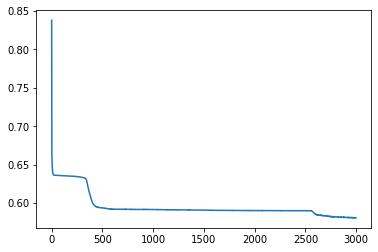

2022-04-24 14:29:39.892240: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
''' Building the NN '''

tf.keras.backend.clear_session()

ilayer = layers.Dense(units = 3, input_dim = len(dataset[0,:-3]), activation="relu")
layer1 = layers.Dense(units = 8, activation="relu")
layer2 = layers.Dense(units = 9, activation="relu")
olayer = layers.Dense(units = 3, activation = "sigmoid")

#last layer has 3 nodes - 3 possibilities

model = keras.Sequential([ilayer,layer1,layer2,olayer])

fraction = 0.35
point = int(len(dataset)*fraction)

xtrain = dataset[:point,:-3]
ytrain = dataset[:point,-3:]

xtest  = dataset[point:,:-3]
ytest  = dataset[point:,-3:]

model.compile(
    optimizer = keras.optimizers.SGD(0.001),
    loss="binary_crossentropy"
    )

''' Training the NN '''

history = model.fit(x = xtrain, y=ytrain, epochs=3000, verbose = False)
plt.plot(history.history["loss"])
plt.show()

Epoch 1/100
2188/2188 [==============================] - 4s 2ms/step - loss: 0.7559
Epoch 2/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.6307
Epoch 3/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.6094
Epoch 4/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5970
Epoch 5/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5880
Epoch 6/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5809
Epoch 7/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5753
Epoch 8/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5704
Epoch 9/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5665
Epoch 10/100
2188/2188 [==============================] - 4s 2ms/step - loss: 0.5634
Epoch 11/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5613
Epoch 12/100
2188/2188 [==============================] - 3s 1ms/step - lo

2188/2188 [==============================] - 3s 1ms/step - loss: 0.5211
Epoch 98/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5207
Epoch 99/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5203
Epoch 100/100
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5198


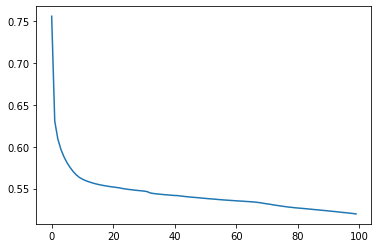

In [52]:
''' Building the NN '''

tf.keras.backend.clear_session()

ilayer = layers.Dense(units = 4, input_dim = len(dataset[0,:-4]), activation="relu")
layer1 = layers.Dense(units = 8, activation="relu")
layer2 = layers.Dense(units = 9, activation="relu")
olayer = layers.Dense(units = 4, activation = "sigmoid")

#last layer has 3 nodes - 3 possibilities

model2 = keras.Sequential([ilayer,layer1,layer2,olayer])

fraction = 0.35
point = int(len(dataset)*fraction)

xtrain = dataset[:point,:-4]
ytrain = dataset[:point,-4:]

xtest  = dataset[point:,:-4]
ytest  = dataset[point:,-4:]

model2.compile(
    optimizer = keras.optimizers.SGD(0.001),
    loss="binary_crossentropy"
    )

''' Training the NN '''

history = model2.fit(x = xtrain, y=ytrain, epochs=100, verbose = True)
plt.plot(history.history["loss"])
plt.show()

In [93]:
pred = model2.predict(xtrain)
test = model2.predict(xtest)


#P = pred[:50,:]

#print(pred[:50,:])
           
def process(prediction):#converts from % prediction to [0,0,1]
    for i in range(len(prediction)):
        Maxj = 0
        for j in range(len(prediction[i])):
            if prediction[i][j] > prediction[i][Maxj]:
                Maxj = j       
        prediction[i] = [0 if prediction[i][Maxj] > prediction[i][j] else 1 for j in range(len(prediction[i]))]

    
process(test)
print(ytrain[:50,:]) 

diff = abs(test - ytest)

eff = 0
for predict in diff:
    eff += 1
    for feature in predict:
        if feature != 0:
            eff -= 1
            break

#print(eff)
#print(len(diff))
eff /= len(diff)
print("Efficeincy : ",eff*100)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
Efficeincy :  38.96833150004231


In [92]:
print(ytest[0])
print(pred[0])

[0. 0. 0. 1.]
[0.41078764 0.17998037 0.42054892]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: photon pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: photon pt (Potential memory leak).


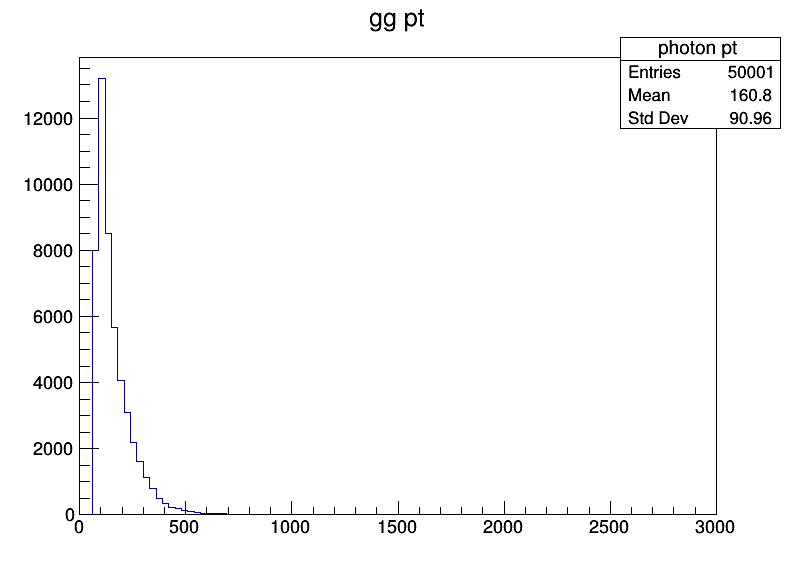

In [73]:
canvas = ROOT.TCanvas('canvas', 'c', 800, 600)
#creates pt histograms
tthist = ROOT.TH1F('photon pt', 'tt pt', 100, 0, 3000)

for d in dataset:
    if d[8] != 1:#not a tt
        continue
    tthist.Fill(np.sqrt(d[0]**2 + d[1]**2))#pt of most energetic photon in tt channel
    
tthist.Draw()
canvas.Draw()

gghist = ROOT.TH1F('photon pt', 'gg pt', 100, 0, 3000)    
for d in dataset:
    if d[9] != 1:
        continue
    gghist.Fill(np.sqrt(d[0]**2 + d[1]**2))
    
gghist.Draw()
canvas.Draw()

WWhist = ROOT.TH1F('photon pt', 'WW pt', 100, 0, 3000)
for d in dataset:
    if d[10] != 1:
        continue
    WWhist.Fill(np.sqrt(d[0]**2 + d[1]**2))
    
#WWhist.Draw()
#canvas.Draw()

<class cppyy.gbl.TH1F at 0x7fbea16cbfb0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


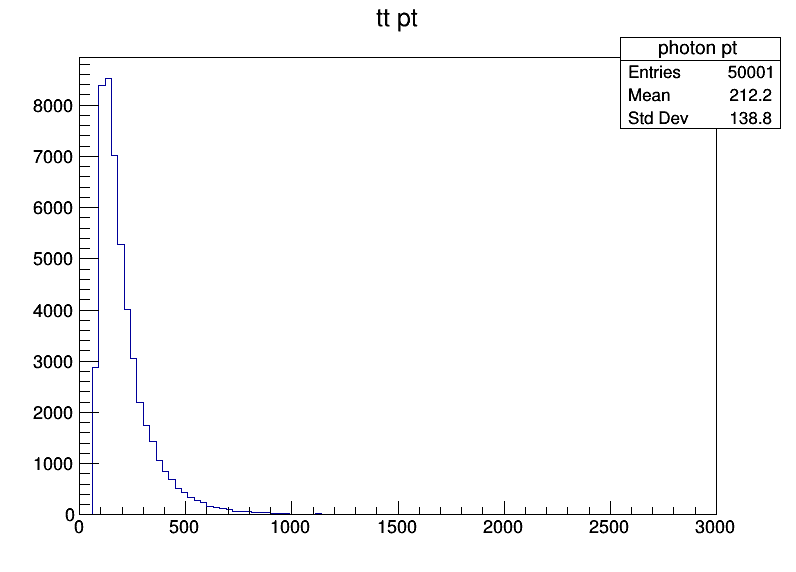

In [21]:
print(type(tthist))

canvas = ROOT.TCanvas('canvas', 'c', 800, 600)

tthist.Draw()
canvas.Draw()

In [34]:
def drawhist(name, Data, filters, function):
    boundlow = 0
    boundhigh = 0
    
    for d in Data:
        skip = False
        for f in filters:
            if f(d) == False:
                skip = True
        if skip:
            continue
        g = function(d)
        if boundlow > g:
            boundlow = g
        if boundhigh < g:
            boundhigh = g
            
    
    hist = ROOT.TH1F(name, name, int(np.sqrt(len(Data))), boundlow, boundhigh)
    
    for d in Data:
        skip = False
        for f in filters:
            if f(d) == False:
                skip = True
        if skip:
            continue
        g = function(d)
        hist.Fill(g)
        
    print(boundlow)
    print(boundhigh)
    return hist

0
1122.0445


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


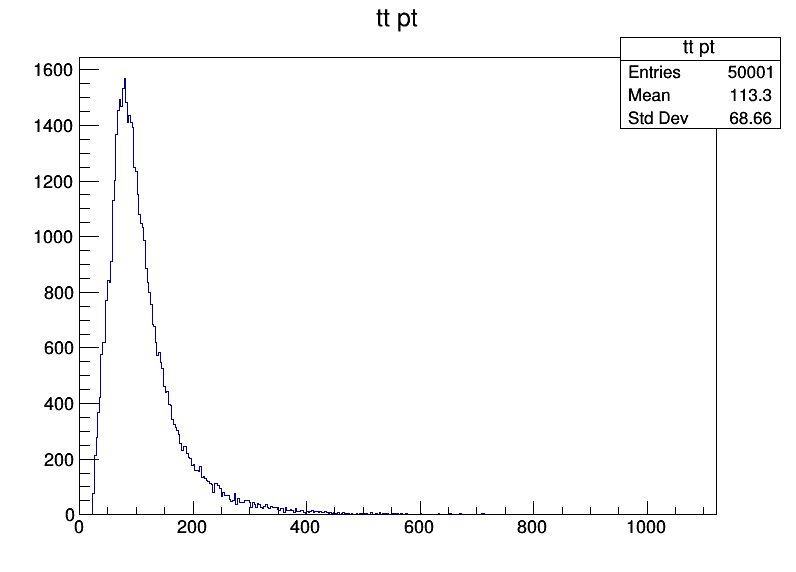

In [49]:
tthist2 = drawhist('tt pt', dataset, [lambda d: (False if d[8] != 1 else True)], lambda d: np.sqrt(d[1]**2 + d[2]**2))
canvas = ROOT.TCanvas('canvas', 'c', 800, 600) 
tthist2.Draw()
canvas.Draw()

0
577.9221249999999


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


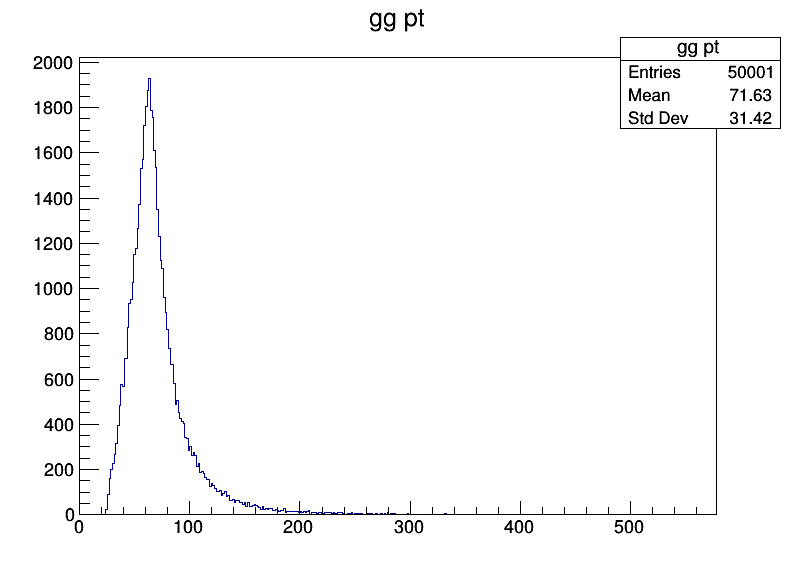

In [48]:
gghist2 = drawhist('gg pt', dataset, [lambda d: (True if d[9] == 1 else False)], lambda d: np.sqrt(d[1]**2 + d[2]**2))
canvas = ROOT.TCanvas('canvas', 'c', 800, 600) 
gghist2.Draw()
canvas.Draw()

0
993.5440624999999


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


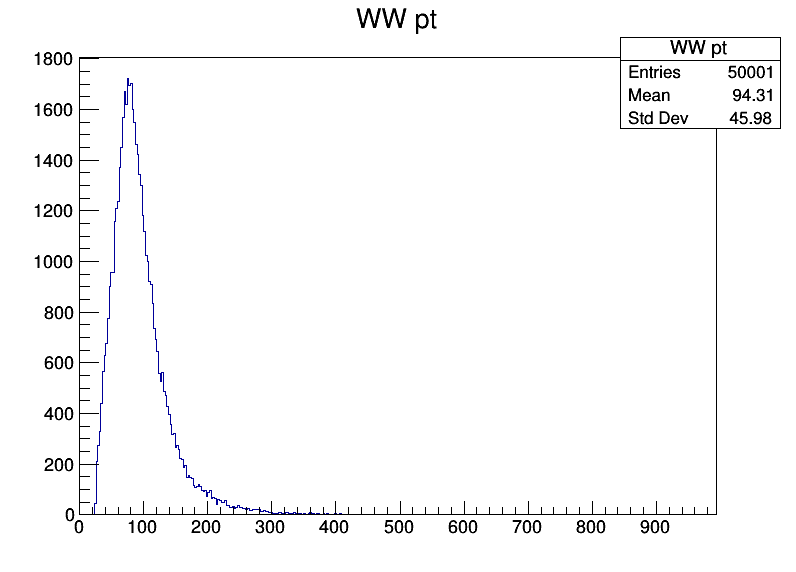

In [47]:
WWhist2 = drawhist('WW pt', dataset, [lambda d: (True if d[10] == 1 else False)], lambda d: np.sqrt(d[1]**2 + d[2]**2))
canvas = ROOT.TCanvas('canvas', 'c', 800, 600) 
WWhist2.Draw()
canvas.Draw()

In [44]:
realdata = []
Channel = data1.Get('mini')
counter = 0
print(Channel.GetEntries())

for event in Channel:
        #if (not event.trigP):
            #continue
    if counter > 50000:
        break
    Photons = []
    if Channel.photon_n != 2:
        continue
    for j in range(Channel.photon_n):
        Momentum = ROOT.TLorentzVector()
        Momentum.SetPtEtaPhiE(Channel.photon_pt[j]/1000., Channel.photon_eta[j],Channel.photon_phi[j],Channel.photon_E[j]/1000.)
        Photons.append(Momentum)
    Photons.sort(key = lambda p : -p.E())#sorts by energy most energetic goes first
    data = []
    for i in range(len(Photons)):
            #momentum of the photons go into nn
        data.append(Photons[i].E() )
        data.append(Photons[i].Px())
        data.append(Photons[i].Py())
        data.append(Photons[i].Pz())
    for vec in OutputMap[channel]:
        data.append(vec)
    realdata.append(data)
    counter += 1
        
        
random.shuffle(realdata)
realdata = np.asarray(realdata)

430344


0
692.3366875


Warning in <TFile::Append>: Replacing existing TH1: data1_pt (Potential memory leak).


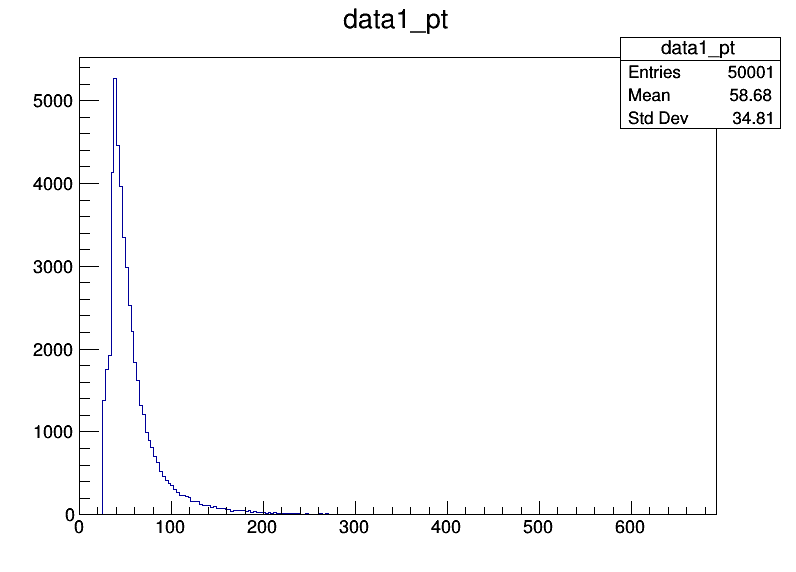

In [46]:
data1hist = drawhist('data1_pt', realdata,[], lambda d: np.sqrt(d[1]**2 + d[2]**2))
data1hist.Draw()
canvas.Draw()



In [64]:
def eta(p):
    pt = np.sqrt(p[1]**2+p[2]**2)
    pz = p[3]
    return np.log(abs(np.tan((pt-pz)/(2*(pt+pz)))))

-11.298435328921588
9.004793267916206


Warning in <TFile::Append>: Replacing existing TH1: tt eta (Potential memory leak).


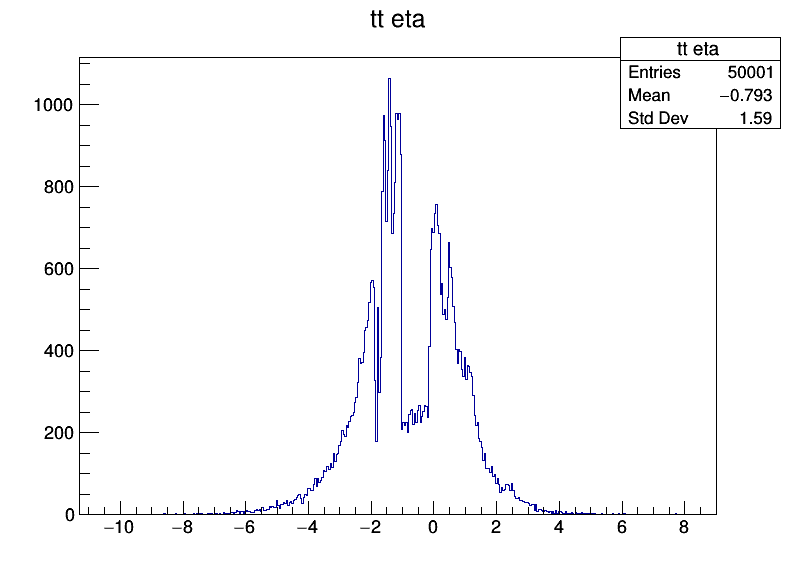

In [65]:
tthisteta = drawhist('tt eta', dataset, [lambda d: (True if d[11] == 1 else False)], lambda d: eta(d))
tthisteta.Draw()
canvas.Draw()

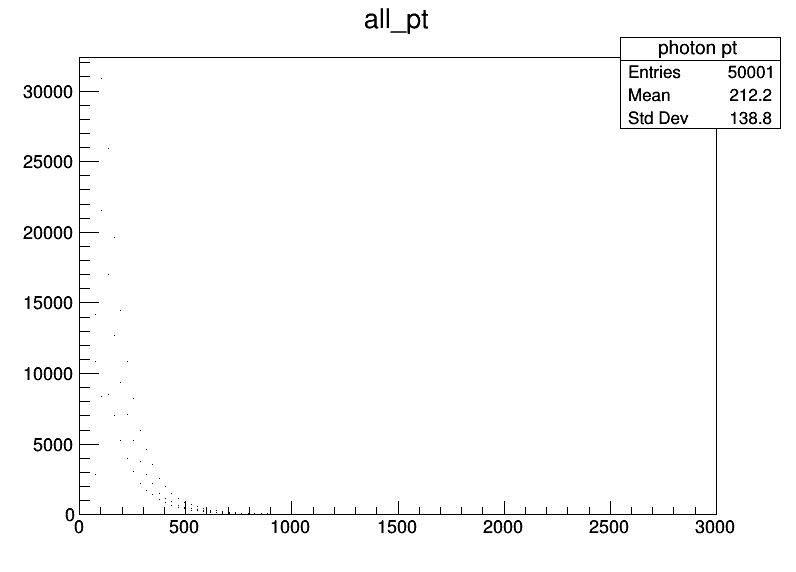

In [84]:
pt = ROOT.THStack('all_pt', 'all_pt')
pt.Add(tthist,'PADS')
pt.Add(gghist,'PADS')
pt.Add(WWhist,'PADS')
pt.Draw()
canvas.Draw()

In [74]:
print(type(WWhist))

<class cppyy.gbl.TH1F at 0x7fbea16cbfb0>


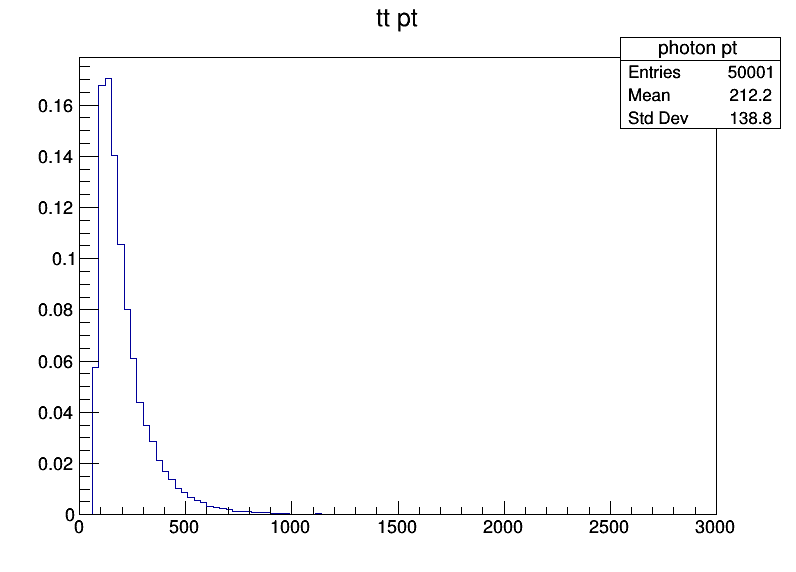

In [78]:
tthist.DrawNormalized()
canvas.Draw()